## Central Limit Theorm

Regardless of the shape of the population, regarless of shape of individual sample, if sample size is large enough, the shape of the SAMPLE MEANS tends to be normally distributed.  
Mu_xbar = mu   
std error = stdev_populatn/sqrt(n)  
Larger sample -> large n -> smaller error  

n > 30, can assume smaple mean normal distributed, but if popultn is highly skewed, it doesnt work.  
study skewness kurtosis of random sample or population  
10 times sq of skewness = sample size  10*skew^2  
OR  
10 times abs value of kurtosis 10* |Kurtosis|  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from scipy.stats import norm
from scipy.stats import t

In [2]:
n = 30
nsim = 1000
df = pd.DataFrame({'y': [-99,-98,-97,-96,-95,5], 'p': [0.002,0.002,0.002,0.002,0.002,0.99]})

ntot = n * nsim
# Create a random sample - simulated random variable
rv = df['y'].sample(ntot, replace=True, weights=df['p'])



## Sample Distribution of Proportion

If data is categorical. Find the proportion.  
phat will follow normal if we can model as normal. Can find mean and stderror.  
categorical not sensitive to sample size, even sample size of 20 will work.  
p - true proportion. 
mu_phat = p
stderr_phat = sqrt(p*(1-p)/n)

Question 1: If true proportion of worker driving bike to work is p = 0.4, what is probability that a sample of size 200 yields a sample proportion between 0.4 and 0.45?

In [3]:
p = 0.4
n = 200
# Sample proportions are normally distributed
mu_phat = p 
se_phat = math.sqrt(p*(1-p)/n)
# P(0.4 < phat < 0.45)

norm.cdf(x = 0.45, scale = se_phat, loc = mu_phat) - norm.cdf(x = 0.4, scale = se_phat, loc = mu_phat)
# Probabability of proportion of worker travelling by bike between 0.4 and 0.425 is 0.425

0.4255426634106171

## Confidence Interval

Interval for our estimation. CI for our sample proportion or sample mean.  
CI = point estimate +- Critical Value * stderr  
Critical value Z(alpha/2) = Z(0.05/2) = 1.96

### Confidence interval of a proportion.  
Checklist for confidence inteval for proportion p  
Sample size should be random. 
sample size should satisfy following condition: n*phat and n*(1-phat) >10.  
Can say the CI is reliable only if conditipons surffice.  

Larger sample size, the std err is reduced and will reduce the range opf CI, narrower interval.

Question 1: Number of offers provided by Credit card company = 1000, number accepted = 140. Generate 95% CI.

In [4]:
n = 1000
phat = 140/n
print(phat)
stderr_phat = math.sqrt(phat * (1-phat)/n)
print('stderr_phat : ',stderr_phat)
LB = phat - 1.96*stderr_phat
UB = phat + 1.96*stderr_phat
print(LB, ' to ', UB)

# There is a 95% CI for the proportion of people who accept the offer is between 0.1185% and 0.1615%
# With 95% confidence, the population proportion that will accept the offer is between 12% and 16%

0.14
stderr_phat :  0.010972693379476163
0.11849352097622673  to  0.1615064790237733


### Confidence Interval of sample mean  
Working with numeric data. 
sigma stddev of population is unknown, we use t distribution. 
we use stderr of sample means.  
CI = point estimate +- Critical Value * stderr  
stderr_xbar = stderr/sqrt(n). 

degree of freedom = (n-1)  controls shape of the distribution.  
dof larger -> n is large --> shape will be more closer to normal disytribution.  

Checklist for confidence inteval for mean
Sample size should be random.  
Sample size should satisfy following condition: 10*|kurtosis|.   
Can say the CI is reliable only if conditipons surffice.

In [5]:
# Find Quantile value i.e Critical value for the t distribution. 95% CV 
df = 125
alpha = 0.05
t.ppf(1-alpha/2, df) 

1.979124109399617

In [6]:
# Find Quantile value i.e Critical value for the t distribution.  1% CV
df = 125
alpha = 0.01
t.ppf(1-alpha/2, df) 
# Wider CI

2.6157333763664727

Question 2: Number of offers provided by Credit card company = 1000, number accepted = 140. Average balance for customer is 1990.5$ , stddev of balance is 2833.33

In [7]:
df = 125 # assumption
alpha = 0.05
n = 140
xbar = 1990.5
s = 2833.33
stderr = s/math.sqrt(n)
print(stderr)
# 95% CI is 
LB = xbar - t.ppf(1-alpha/2, df) * stderr
UB = xbar + t.ppf(1-alpha/2, df) * stderr
print(LB, ' to ', UB)

# We are 95% confident that mu lies between $1516.5788 and $2464.421
# The mean balance of 95% of samples of this size will fall between $1516.5788 and $2464.421

239.46009045499477
1516.5787617415067  to  2464.4212382584933


Might mu be $1,250?  
We reject this as the mu is not in the bound.  
It could be, but based on sample results but it is very less likely.

Wrong interpretation:  
95% of all customers keep balance between $1516.5788 and $2464.421.  


### Margin of error

Margin of error is the half width of the confidence interval.  
CV * SE is the margin of error when calculating the confidence interval.  
Three things have impact on the margin of error:  
Level of confidence, alpha. 
Variation of data,s .  
sample size, n. 

Derive sample size:  
We mostly work on 95% CI, considering large n, CV is approx 2  
Considering we know sigma
margin of error = e = CV * sigma / sqrt(n). 
e = 2 * sigma / sqrt(n)  
n = 4 * sigma^2/e^2  

But sigma of population is not known to us. Instead of sigma find stddev of sample s.  
n = 4 * s^2/e^2. 

## Statistical Testing

Hypothesis - Testable statement about a population parameter.  
H0 - Null hypothesis is current belief in a situation. Always believe it is true.  
H1- alternative hypothesys. Research claim is always in H1.


### Hypothesis test for population

Question 1: A manager is evaluating software for spam filter (cost $ 15000). To make it profitable the software should reduce spam to less than 20%. Should the manager buy the software? 

In [17]:
# p : proportion of email that slip past the filter
# Ho: p >= 20
# H1: p < 20

# eg: 100 email review showed 12% spam
n = 100
phat = 0.12
# Less than 20% passed the spam, which is good, but is this by chance?
p0 = 0.2

# null distribution of phat can be approx as normal if
print(' n*phat > 10: ', n*phat > 10)
print(' n*(1-phat) > 10: ', n*(1-phat) > 10)
# sample size is large enough
# null distribution for phat has following param
mu_phat = p0
# SE of phat
sigma_phat = math.sqrt(p0 * (1 - p0)/n)
# Find test statistic i.e zscore = (X-Mu)/sigma
Zstat = (phat - mu_phat)/sigma_phat
print('Zstat : ', Zstat)
# Does Zstat fall under critical region, it is a one sided test, check just the left side
alpha = 0.05
print('Reject H0 : ', Zstat < -norm.ppf(1-alpha))

# Finding p value
# pvalue = p(Z <Zstat) 
norm.cdf(Zstat, 0 ,1)

# Difference between phat and p0 is not buy chance and is statistically significant.

 n*phat > 10:  True
 n*(1-phat) > 10:  True
Zstat :  -2.0000000000000004
Reject H0 :  True


0.022750131948179177

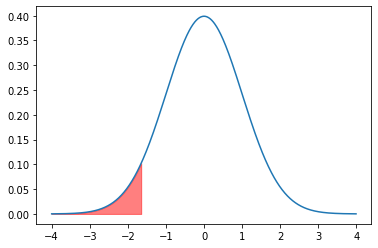

In [9]:
z = np.arange(-4, 4, 0.01)
fig, ax = plt.subplots()
ax.plot(z, norm.pdf(z))
px=np.arange(-4,-norm.ppf(1-alpha),0.01)
ax.fill_between(px,norm.pdf(px),alpha=0.5, color='r')
plt.show()

### Pvalue

It is the smallest alpha level at which H0 can be rejected.  

### Hypothesis test for Mean

Question 1: Firm is considering expanding an expensive area to downtown. In order to cover cost firm needs rent in this are to be more than $1500 per month.  
Are rent in SF high enough to justify the expansion.   
Rents obtained from sample size n = 115, average rent was $1657, with s = $581

In [13]:
# mu = monthly rent for all rental prop in Sf area. 
# H0 => mu <= 1500
# H1 => mu >1500

# Null hypothesis
mu0 = 1500

# Sampling information
n = 115
xbar = 1657
s = 581

# Sample average is 1657 i.e > 1500, did this happen by chance?

# Null distribution of xbar is approximated by t test

# Null distribution has following parameters

muXbar = mu0

sigmaXbar = s/math.sqrt(n)

# T-test tsats
Tstat = (xbar - muXbar)/sigmaXbar
print('Tstat : ', Tstat)

# Test the significance
alpha = 0.05
df = n - 1

print('Reject H0 : ', Tstat > t.ppf(1-alpha, df))

# Finding p value
# pvalue = p(T > Tstat) = 1 - P(T <= Tstat)
1 - t.cdf(Tstat, df)

# Reject null hypothesis 
# Means the difference between xbar and mu0 is not by chance
# Mean rent exeeds the break even. it is profitable


Tstat :  2.8978269040927476
Reject H0 :  True


0.002253604158582556

## Two Sample population test

Question 1: A fitness chain os considering licensing a special diet at cost of $200,000. Is it more effective than the conventional government recommended food pyramid?  
Review of 150 member using Artekan diet showwed 72\% renewed their membership.  
Review of 220 member using general diet showwed 60\% renewed their membership.


In [25]:
# Let pa be proportion of people on artekans (new) diet who renew membership
# pc be the proportion of people on conventional diet who renew membership
# pa - pc are extra proportion who renew if on artekans diet

# To be more profitable the difference must me more than 4%
# H0 -> pa - pc <= 4
# H1 -> pa - pc > 4

# Null hypothesis
nullDiff = 0.04

# Sampling info
n_a = 150
phat_a = 0.72

n_g = 220
phat_g = 0.6

# phat_a is 12% more than phat_g. Is this by chance?

# null distribution of (phat_a - phat_g) can be approximated as normal if
print(' n_a*phat_a > 10: ', n_a*phat_a > 10)
print(' n_a*(1-phat_a) > 10: ', n_a*(1-phat_a) > 10)

print(' n_g*phat_g > 10: ', n_g*phat_g > 10)
print(' n_g*(1-phat_g) > 10: ', n_g*(1-phat_g) > 10)

# Null hypothesis of (phat_a - phat_g) has following parameters
muphatDiff = phat_a - phat_g
sigmaphatDiff = math.sqrt(phat_a * (1 - phat_a)/ n_a + phat_g * (1 - phat_g)/ n_g)
# This is stderr of phat

# Find test stats
Zstat = (muphatDiff - nullDiff)/sigmaphatDiff

print('Zstat : ', Zstat)

# Test the significance
alpha = 0.05

print('Reject H0 : ', Zstat > norm.ppf(1-alpha))

# Finding p value
# pvalue = p(z > Zstat) = 1 - P(z <= Zstat)
1 - norm.cdf(Zstat)

# Fail to reject null hypothesis at 0.05 level of significance
# Difference between phat_a - phat_g is not significantly more than 0.04

# Calculating confidence interval between the two diets
LB = (phat_a - phat_g) - norm.ppf(1-alpha/2) * sigmaphatDiff
UB = (phat_a - phat_g) + norm.ppf(1-alpha/2) * sigmaphatDiff
print(LB, ' to ', UB)

# The 95% CI for diff between proportions who renew on Artkens and conventional diet is between 0.023 and 0.217
# When 95% CI doesnot include 0 then we say that two proportions are statistically 
# significantly different from each other

 n_a*phat_a > 10:  True
 n_a*(1-phat_a) > 10:  True
 n_g*phat_g > 10:  True
 n_g*(1-phat_g) > 10:  True
Zstat :  1.6212448570464
Reject H0 :  False
0.023285973070805085  to  0.2167140269291949


## Two Sample Mean test

Weight people loose by Articans is atleast more than 5 pounds

In [38]:
# mu_a = mean weight loss in population due to Artikan diet
# mu_g = mean weight loss in population due to general diet
# H0 -> mu_a - mu_g <= 5
# H1 -> mu_a - mu_g > 5

# Articans 
n_a = 33
Xbar_a = 15.42
s_a = 14.37
kurt_a = 0.100

# Conventional
n_g = 30
Xbar_g = 7
s_g = 12.36
kurt_g = -0.565

nullDiff = 5

# Xbar_a is 8.42 lb more than Xbar_g. Is this by chance?
# distrbution ofThe null of(Xbar_a - Xbar_g) can be modeled as normal if
print(' n_a > 10*abs(kurt_a): ', n_a > 10*abs(kurt_a))
print(' n_g > 10*abs(kurt_g): ', n_g > 10*abs(kurt_g))

XbarDiff = Xbar_a - Xbar_g

# Null distribution of XbarDiff has following parameters
muXbarDiff = nullDiff
sigmaXbarDiff = math.sqrt((s_a)**2/ n_a + (s_g)**2/ n_g)

# Find Test stats
Zstat = (XbarDiff - nullDiff)/sigmaXbarDiff

print('Zstat : ', Zstat)

# Test the significance
alpha = 0.05
num = (s_a ** 2 / n_a + s_g ** 2 / n_g) ** 2
denom = (s_a ** 2 / n_a)** 2/(n_a - 1) + (s_g ** 2 / n_g)** 2/(n_g - 1)
df = num/denom

print('Reject H0 : ', Zstat > t.ppf(1-alpha, df))
# Fail to reject null hypothesis
# Diff between Xbar_a and  Xbar_g is not statistcally more than 5 lb

# Finding p value
# pvalue = p(z > Zstat) = 1 - P(z <= Zstat)
1 - t.cdf(Zstat, df)

# Calculating confidence interval between the two diets
LB = (Xbar_a - Xbar_g) - t.ppf(1-alpha/2, df) * sigmaXbarDiff
UB = (Xbar_a - Xbar_g) + t.ppf(1-alpha/2, df) * sigmaXbarDiff
print(LB, ' to ', UB)
# Difference is significant as 0 is not in the range
# But significance is not larger than 5
# With Artikan can loose 5 puond for sure if lower bound was more than 5 but not in this case.

 n_a > 10*abs(kurt_a):  True
 n_g > 10*abs(kurt_g):  True
Zstat :  1.0151540858219992
Reject H0 :  False
1.682984117461447  to  15.157015882538552


## ChiSq Test - Testing two categorical variables